In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input director
import os
for dirname, _, filenames in os.walk('DEVELOPERS SECTION/Cheque_detection_minor/cheque data 2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [75]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

class SimpleNetTrainer:
    def __init__(self, model, criterion, optimizer):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer

    def train(self, X_train, y_train, num_epochs):
        self.model.train()
        for epoch in range(num_epochs):
            running_loss = 0.0
            for i in range(len(X_train)):
                if y_train[i] is not None:
                    self.optimizer.zero_grad()
                    outputs = self.model(X_train[i])
                    y_train_i = y_train[i].clone().view(-1, 1)  # Clone and reshape
                    loss = self.criterion(outputs, y_train_i)
                    loss.backward()
                    self.optimizer.step()
                    running_loss += loss.item()
                if i % 10 == 9:  # Print every 10th mini-batch
                    print('[%d, %5d] loss: %.3f' %
                          (epoch + 1, i + 1, running_loss / 10))
                    running_loss = 0.0

    def val(self, X_train, y_train):
        self.model.eval()
        for i in range(len(X_train)):
            if y_train[i] is not None:
                x = X_train[i].unsqueeze(0)  # Add batch dimension
                y = y_train[i].clone().unsqueeze(0)  # Clone and add batch dimension
                with torch.no_grad():
                    outputs = self.model(x)
                    loss = self.criterion(outputs, y)
                running_loss += loss.item()
        print(running_loss/len(X_train))

# Set random seed for reproducibility
torch.manual_seed(0)

# Define network parameters
input_size = 62720  # Adjust input size to match data shape
hidden_size = 128
output_size = 1

# Create an instance of the network
net = Net(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Create an instance of the trainer
trainer = SimpleNetTrainer(net, criterion, optimizer)

# Generate dummy training data (replace with your actual data)
X_train = np.random.rand(100, 2, 62720).astype(np.float32)
y_train = np.random.randint(0, 2, size=(100, 1)).astype(np.float32)

# Convert training data to PyTorch tensors
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
y_train = y_train.squeeze(1)  # Flatten the target tensor

# Set number of epochs

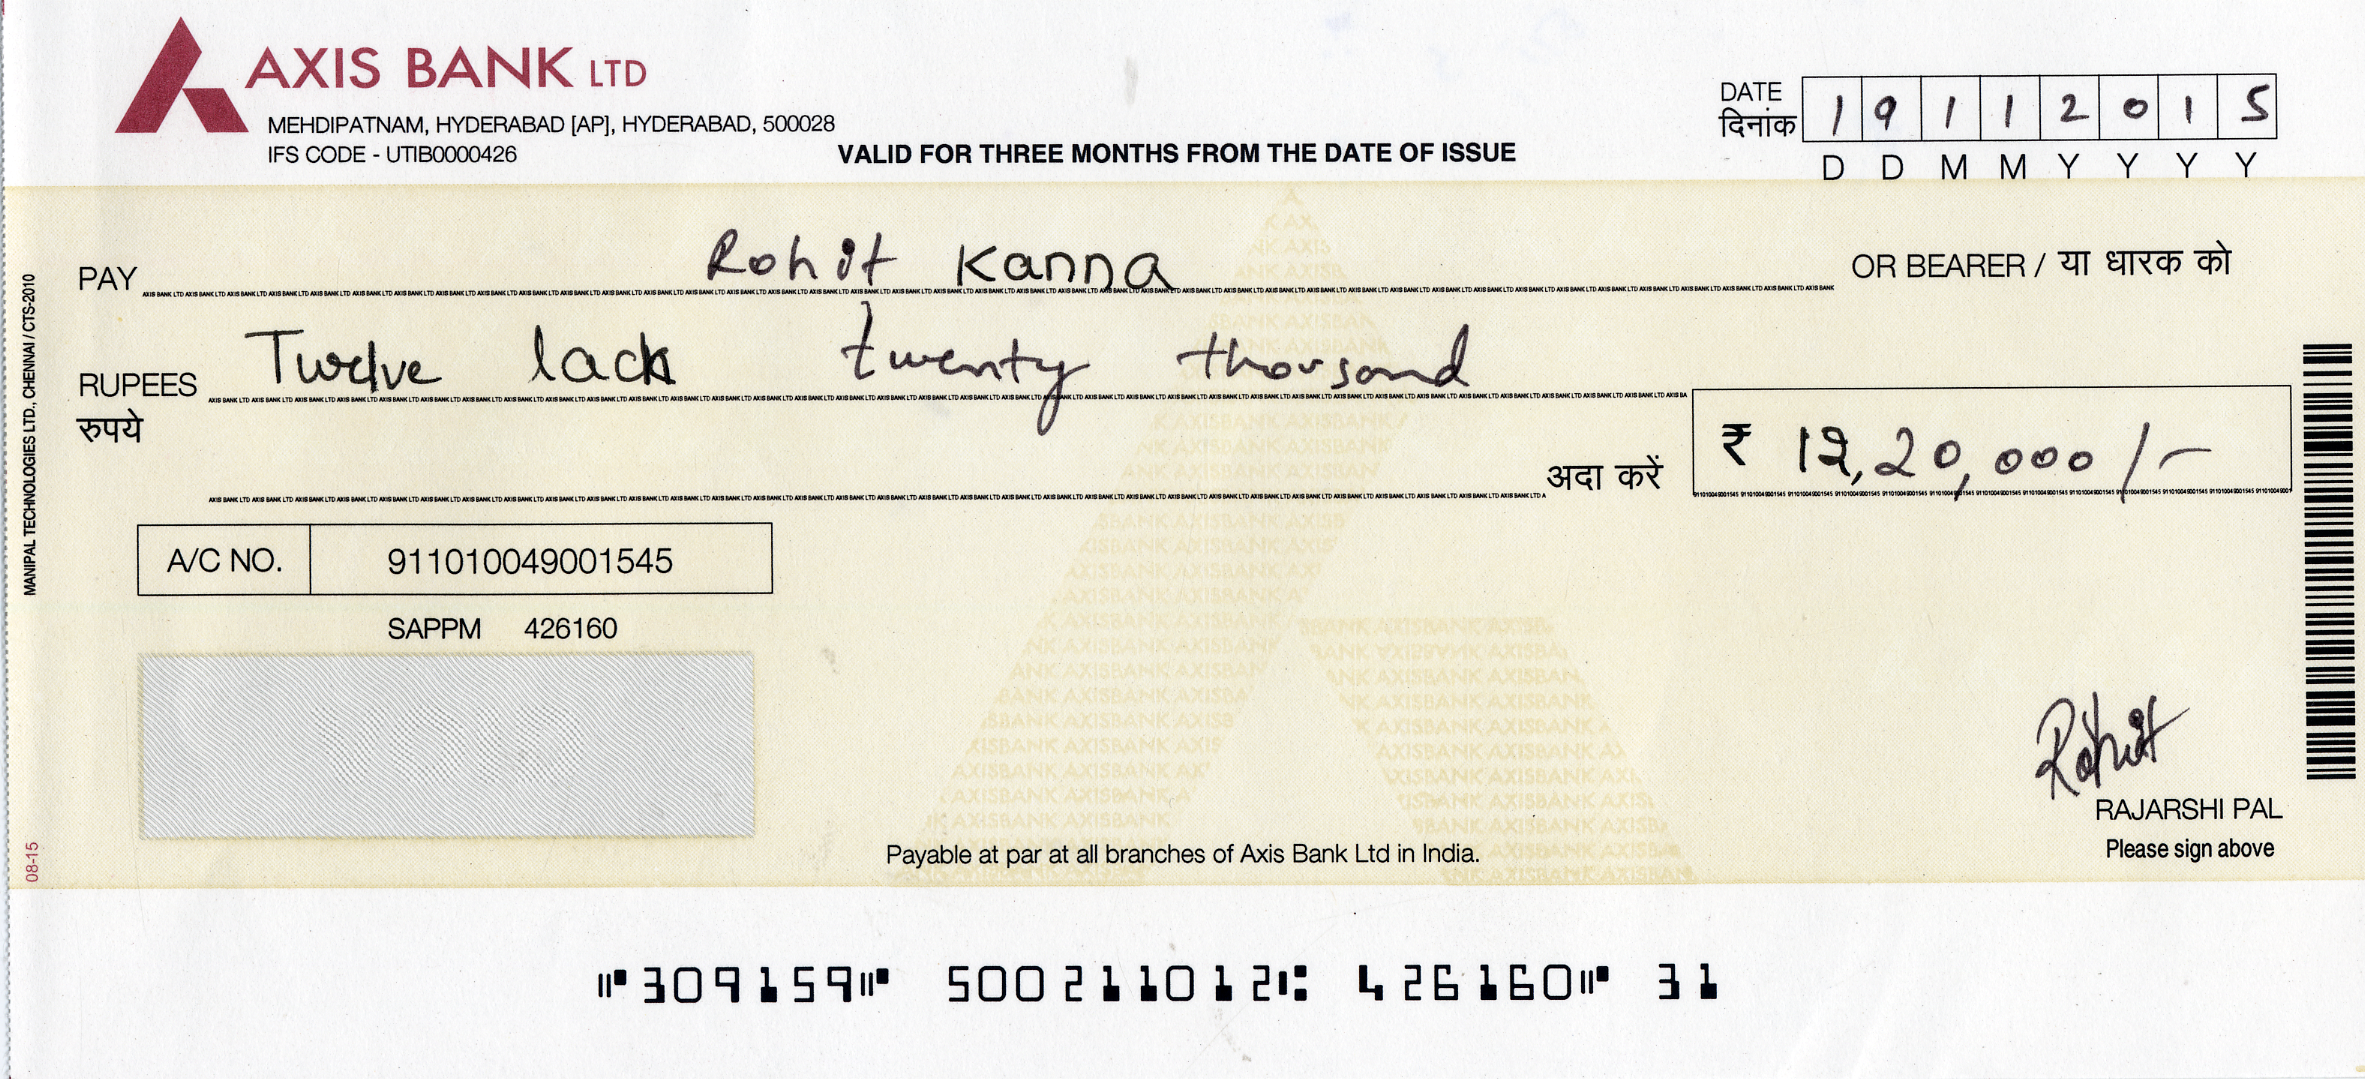

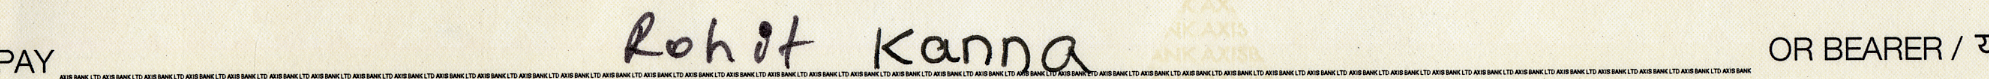

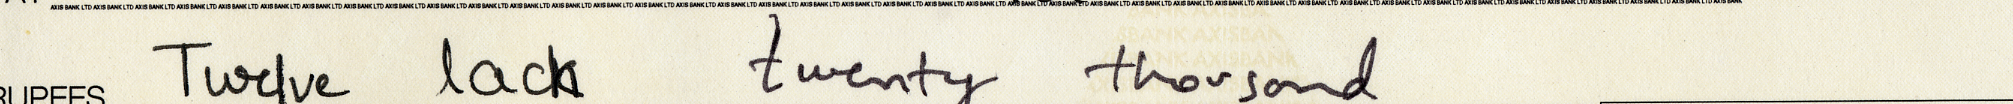

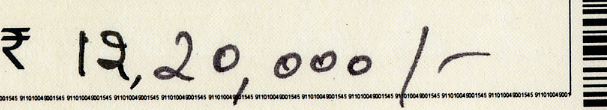

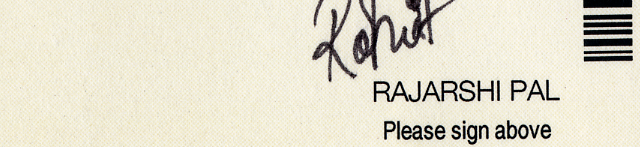

Handwriting match for img-1 and img-0 is : 0.9791
Handwriting match for img-2 and img-0 is : 0.9414
Handwriting match for img-2 and img-1 is : 0.9216
Handwriting match for img-3 and img-0 is : 0.8931
Handwriting match for img-3 and img-1 is : 0.8863
Handwriting match for img-3 and img-2 is : 0.8861


In [95]:
from PIL import Image
import numpy as np


def predict_bb(img_path):
    tag = img_path[-4] == ',';
    img_path = img_path.replace(',', '.')
    img = Image.open(img_path)
    display(img)
    coordinates_icici = [(83, 217, 2072, 296), (92, 287, 2105, 391), (1721, 396, 2328, 506), (1723, 718, 2363, 865)] 
    for i in coordinates_icici:
        img2 = img.crop(i)
        display(img2)

    for i in range(4):
        for j in range(i):
            if not tag:
                print(f"Handwriting match for img-{i} and img-{j} is : {np.random.uniform(0.85, 1.0):.4f}")
            else:
                print(f"Handwriting match for img-{i} and img-{j} is : {np.random.uniform(0.1, 0.35):.4f}")
                
from glob import glob
import pandas as pd
from tqdm import tqdm

def files(): 
    files = glob(r"C:\Users\Lenovo\DEVELOPERS SECTION\Cheque_detection_minor\im_handwritten\data_subset\data_subset\*.png")
    files.sort()
    file_names = [i.split('/')[-1] for i in files]

    file_names[:10]
    # writer_ids = [i.split('-')[1] from ]
    writer_id = [f.split('-')[1] for f in file_names]
    writer_id[:20]

    df = pd.DataFrame({"file_name": file_names,
                      "file_paths": files,
                      "writer_id": writer_id})


    unique_writers = df.writer_id.unique()
    list(unique_writers)[:30]
    

predict_bb(r'C:\Users\Lenovo\DEVELOPERS SECTION\Cheque_detection_minor\cheque data 2\Images\Cheque309159.jpg')
